In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('Social_Network_Ads.csv')

In [23]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


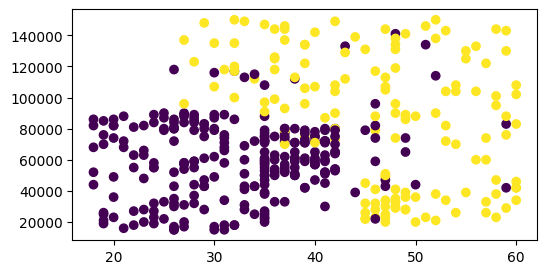

In [24]:
plt.figure(figsize=(6,3))
plt.scatter(df['Age'],df['EstimatedSalary'],c=df['Purchased'])

In [25]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# as we see the y axis is more dominant as compare to x axis so we need to do scaling and bring them to same axis 0-1. to avoid dominance.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)

In [30]:
for k in range(1,10,2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled,y_train)
    all_model_scores = round(model.score(scaler.transform(X_test),y_test),2)
    print(k,all_model_scores)

1 0.86
3 0.91
5 0.93
7 0.94
9 0.94


In [31]:
# we will take k as 7, as it has best score

In [32]:
final_model = KNeighborsClassifier(n_neighbors=7)
final_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [41]:
if final_model.predict([[34,45000]]) == 1:
    print('Customer will purchase')
else:
    print("No Purchase")

Customer will purchase


In [39]:
final_model.score(X_train_scaled,y_train)*100

91.875

In [40]:
final_model.score(scaler.transform(X_test),y_test)*100

93.75

In [55]:
# this process is done to see the decison boundry as below function requires parameter of dataframe type
X_train_scaled_for_plot = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)


In [38]:
from mlxtend.plotting import plot_decision_regions

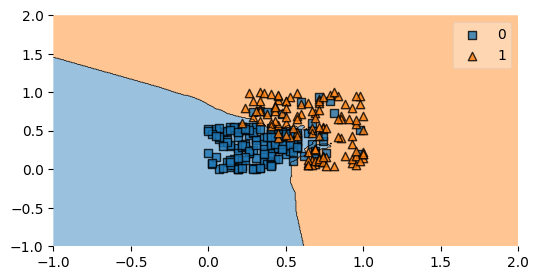

In [57]:
plt.figure(figsize=(6,3))
plot_decision_regions(X_train_scaled_for_plot.to_numpy(),y_train.to_numpy(),clf=final_model)
plt.show()